In [1]:
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import random
import secrets

In [2]:
random.seed(0)
class GA:
    def __init__(self, datafile, m_individual, n_generations):
        self.datafile = datafile
        self.m_individual = m_individual
        self.n_generations = n_generations
        self.__features_x = None
        self.__sale_y = None

    def read_data_from_file(self):
        data = np.genfromtxt(self.datafile, delimiter=',', dtype=None, skip_header=1)
        features = data[:, :3]
        one_array = np.ones((len(features), 1))
        self.__features_x = np.hstack((one_array, features))
        self.__sale_y = data[:, 3]
        return self.__features_x,self.__sale_y
    
    
    def create_individual(self, n=4, bound=10):
        individual = []
        for _ in range(n):
            individual.append(round(random.uniform(-bound/2, bound/2), 2))
        return individual
    
    def compute_loss(self, individual):
        n = len(self.__features_x)
        theta = np.array(individual)
        y_hat = self.__features_x.dot(theta)
        loss = ((y_hat - self.__sale_y.T).T.dot(y_hat - self.__sale_y.T))/(n)
        return loss.item()


    def compute_finess(self, individual):
        loss = self.compute_loss(individual)
        fitness_value = 1/(loss+1)
        return fitness_value
    
    def intial_population(self, n_gen=4):
        population = [self.create_individual(n_gen) for _ in range(self.m_individual)]
        return population


    def sort_population(self, population):
        fitness_value = [self.compute_finess(individual_a)
                        for individual_a in population]
        index_sort = np.argsort(fitness_value)
        sorted_population = np.array(population)[index_sort]
        return sorted_population.tolist()
    
    def select_good_individual(self, sorted_population, m=100):
        index1 = secrets.randbelow(m-1)
        while True:
            index2 = secrets.randbelow(m-1)
            if (index2 != index1):
                break
        selected = sorted_population[index1]
        if index2 > index1:
            selected = sorted_population[index2]
        return selected
    
    def crossover(self, individual1, individual2, crossover_rate=0.9):
        individual1_new = individual1.copy()
        individual2_new = individual2.copy()
        for i in range(len(individual1)):
            bound = max(np.abs(individual1)).item() + 1
            if random.uniform(-bound, bound) < crossover_rate:
                individual1_new[i] = individual2[i]
                individual2_new[i] = individual1[i]
        return individual1_new, individual2_new
    
    def mutation(self, individual, mutation_rate=0.05):
        individual_m = individual.copy()
        for i in range(len(individual)):
            if individual_m[i] < mutation_rate:
                individual_m[i] = random.uniform(-5, 5)
        return individual_m
    
    def create_new_population(self, sorted_population, elitism=2):
        m = len(sorted_population)
        new_population = []
        while len(new_population) < m - elitism:
            # selection
            selection1 = self.select_good_individual(sorted_population)
            # crossover
            individual1, individual2 = self.crossover(selection1, sorted_population[-1])
            # mutation
            individual1_m = self.mutation(individual1)
            individual2_m = self.mutation(individual2)
            new_population.append(individual1_m)
            new_population.append(individual2_m)
        # copy elitism chromsomes into the next generation
        new_population = new_population + sorted_population[-elitism:]
        return new_population
        
    def genetic_algorithm(self):
        self.read_data_from_file()
        population = self.intial_population()
        lost_list = []
        best_list = []
        for gen in range(self.n_generations):
            if gen%100 == 0:
                print('Generation:', gen)
            sorted_population = self.sort_population(population)
            loss = self.compute_loss( sorted_population[-1])
            lost_list.append(loss)
            best_list.append(sorted_population[-1])
            population = self.create_new_population(sorted_population)
        return lost_list, best_list
    
    



In [16]:
linear_regression = GA('dataset/advertising.csv',600, 200)


Generation: 0
Generation: 100


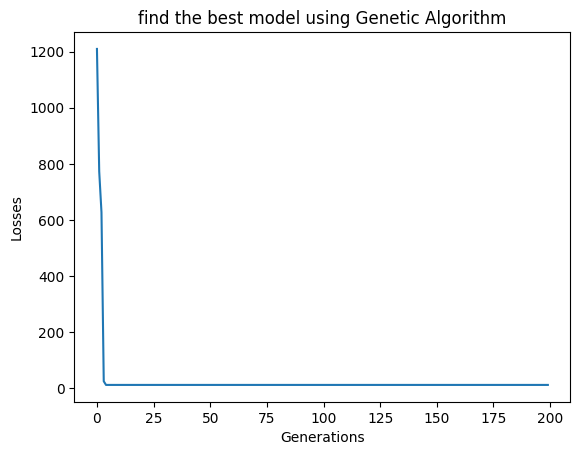

In [22]:
lost_list, loss= linear_regression.genetic_algorithm()
plt.plot(lost_list)
plt.title("find the best model using Genetic Algorithm")
plt.xlabel("Generations")
plt.ylabel("Losses")
plt.show()

In [23]:
print(loss)

[[2.26, -0.25, 1.56, 0.16], [2.17, -0.12656445934568694, 1.56, 0.11], [3.6, -0.11516568247858316, 0.21, 0.11], [3.6, 0.05536125989627383, 0.15943507027419024, 0.11], [0.5930201705048788, 0.05536125989627383, 0.15943507027419024, 0.11], [0.5930201705048788, 0.05536125989627383, 0.15943507027419024, 0.11], [0.5930201705048788, 0.05536125989627383, 0.15943507027419024, 0.11], [0.5930201705048788, 0.05536125989627383, 0.15943507027419024, 0.11], [0.5930201705048788, 0.05536125989627383, 0.15943507027419024, 0.11], [0.5930201705048788, 0.05536125989627383, 0.15943507027419024, 0.11], [0.5930201705048788, 0.05536125989627383, 0.15943507027419024, 0.11], [0.5930201705048788, 0.05536125989627383, 0.15943507027419024, 0.11], [0.5930201705048788, 0.05536125989627383, 0.15943507027419024, 0.11], [0.5930201705048788, 0.05536125989627383, 0.15943507027419024, 0.11], [0.5930201705048788, 0.05536125989627383, 0.15943507027419024, 0.11], [0.5930201705048788, 0.05536125989627383, 0.15943507027419024, 0